In [4]:
import numpy as np
import numpy.linalg as la
import matplotlib
from scipy.linalg import sqrtm, logm, expm
from utils import random_psd, karcher_mean
from geometric_optimizers import RGD_optimizer, RAGD_optimizer, RAGDsDR_optimizer, Riemann_coupling, RAGDsDR_optimizer_no_transp
import matplotlib.pyplot as plt
from pymanopt.manifolds import PositiveDefinite
import torch
import random
import time

%config InlineBackend.figure_format = 'svg'

In [5]:
d = 100 #problem dimension
M = PositiveDefinite(d)   

def dist(X,Y): return M.dist(X,Y)

def log(X,Y): 
    return M.log(X,Y)

def cost(X): return np.log(la.det(X))

def grad(X): return X#return M.egrad2rgrad(X,la.inv(X))

def exp_manopt(X,U): return np.dot(X,expm(np.dot(la.inv(X),U))) #VERY unstable

def exp(X,U):
    c = la.cholesky(X)
    c_inv = la.inv(c)
    e = expm(np.dot(np.dot(c_inv, U),c_inv.T))
    return np.dot(np.dot(c, e), c.T)

def retr(X,U):
    return X + U + 0.5* np.dot(np.dot(U,la.inv(X)),U)

def transp(X,Y,U): return M.transp(X,Y,U)

#initialization
np.random.seed(21)
C=np.random.randn(d,d)
x0 = np.dot(C,C.T)
N=50
L = 100

In [6]:
t1, x1, f1 = RGD_optimizer(N,x0,L,cost,grad,exp)
t2, x2, f2 = RAGD_optimizer(N,x0,L,1,cost,grad,retr,log)
t3, x3, f3, beta3 = RAGDsDR_optimizer(N,x0,L,cost,grad,exp,log,transp,5)
t4, x4, f4, beta4 = RAGDsDR_optimizer(N,x0,L,cost,grad,exp,log,transp,-1)


An error occurred in the computation of y[k], setting it to x[k]
An error occurred in the computation of v[k+1], setting it to v[k]
An error occurred in the computation of y[k], setting it to x[k]
An error occurred in the computation of v[k+1], setting it to v[k]
An error occurred in the computation of y[k], setting it to x[k]
An error occurred in the computation of v[k+1], setting it to v[k]
An error occurred in the computation of y[k], setting it to x[k]
An error occurred in the computation of v[k+1], setting it to v[k]
An error occurred in the computation of y[k], setting it to x[k]
An error occurred in the computation of v[k+1], setting it to v[k]
An error occurred in the computation of y[k], setting it to x[k]
An error occurred in the computation of v[k+1], setting it to v[k]
An error occurred in the computation of y[k], setting it to x[k]
An error occurred in the computation of v[k+1], setting it to v[k]
An error occurred in the computation of y[k], setting it to x[k]
An error oc

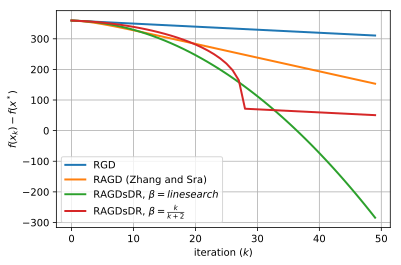

In [7]:
fig, ax = plt.subplots()
ax.plot(range(N), f1,label='RGD',linewidth=2)
ax.plot(range(N), f2,label='RAGD (Zhang and Sra)',linewidth=2)
ax.plot(range(N), f3,label=r'RAGDsDR, $\beta = linesearch$',linewidth=2)
ax.plot(range(N), f4,label=r'RAGDsDR, $\beta = \frac{k}{k+2}$',linewidth=2)

#ax.loglog(range(N), 10*np.divide(1,range(N)),'--',label='$O(1/k)$',color='black')
ax.set(xlabel='iteration $(k)$', ylabel='$f(x_k)-f(x^*)$')

ax.grid()
ax.legend()
#ax.set_ylim(bottom=1e-12)
plt.show()
#fig.savefig('result.eps', format='eps', dpi=1000)